In [47]:
import matplotlib.pyplot as plt
import math

In [125]:
L1, L2 = 160, 170

In [189]:
def ikin(x, y, is_front_leg):
    """Returns the joint angle of each 2 DOF leg
    """
    alpha, beta = 0, 0  
    alpha  = math.atan2(x, y)
    beta = math.acos((L1**2 + x**2 + y**2 - L2**2)/(2*L1*math.sqrt(x**2 + y**2)))
    if is_front_leg:
        theta1 = alpha + beta
        theta2 = -math.acos((x**2 + y**2 - L1**2 - L2**2)/(2*L1*L2))
    else:
        theta1 = alpha - beta
        theta2 = math.acos((x**2 + y**2 - L1**2 - L2**2)/(2*L1*L2))
    #theta1 = math.atan2(y, x) - math.atan2((L2*math.sin(theta2)), (L1+L2*math.cos(theta2)))
     
    return theta1, theta2

In [190]:
def draw_leg(joint1, joint2):
    x = [0]
    y = [0]
    
    x1 = L1* math.cos(joint1)
    y1 = L1*math.sin(joint1)
    
    x.append(x1)
    y.append(y1)
    
    x2 = x1 + L2 * math.cos(joint1 + joint2)
    y2 = y1 + L2 * math.sin(joint1 + joint2)
    
    print("X: {}".format(x2))
    print("Y: {}".format(y2))
    
    x.append(x2)
    y.append(y2)
    
    plt.plot(x, y)
    plt.xlim([-330, 330])
    plt.ylim([-330, 330])
    plt.show()

Theta1: -0.994
Theta2: -1.116
X: -0.03235792019208361
Y: -279.9942780765172


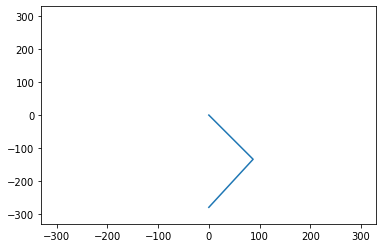

In [191]:
theta1, theta2 = ikin(-280, 0, is_front_leg=True)
theta1 = float("{:.3f}".format(theta1))
print("Theta1: {}".format(theta1))
theta2 = float("{:.3f}".format(theta2))
print("Theta2: {}".format(theta2))
draw_leg(theta1, theta2)

Theta1: -2.148
Theta2: 1.116
X: -0.08169674339129074
Y: -279.9942680275209


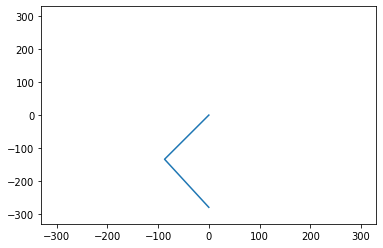

In [192]:
theta1, theta2 = ikin(-280, 0, is_front_leg=False)
theta1 = float("{:.3f}".format(theta1))
print("Theta1: {}".format(theta1))
theta2 = float("{:.3f}".format(theta2))
print("Theta2: {}".format(theta2))
draw_leg(theta1, theta2)